In [1]:
from blackhc import mdp
import numpy as np
import itertools

## Random Game 1
Any nonterminal state will goes to the next state, no matter which action is taken.

In [40]:
spec = mdp.MDPSpec()
num_non_terminal_states = 3
num_actions = (2, 3)
reward_range = [-2,2]
action_sets = []
for per_player_actions in num_actions:
    index_actions = np.arange(per_player_actions)
    action_sets.append([str(a) for a in index_actions])
print("Action set for each player: ", action_sets)

actions = list(itertools.product(*action_sets))
single_player_actions = [''.join(a) for a in actions]
print("Merged action set: ", single_player_actions)
single_player_action_set = []
for a in single_player_actions:
    single_player_action_set.append(spec.action('A'+a))

state_set =[]
for i in range(num_non_terminal_states):
    state_set.append(spec.state(f"s{i}"))
state_set.append(spec.state(f"s{i+1}", terminal_state=True))
print(state_set)

for j in range(len(state_set)-1):
    for a in single_player_action_set:
        spec.transition(state_set[j], a, mdp.NextState(state_set[j+1]))
        spec.transition(state_set[j], a, mdp.Reward(np.random.uniform(*reward_range)))  # random reward for each transition

Action set for each player:  [['0', '1'], ['0', '1', '2']]
Merged action set:  ['00', '01', '02', '10', '11', '12']
[State(s0, 0, False), State(s1, 1, False), State(s2, 2, False), State(s3, 3, True)]


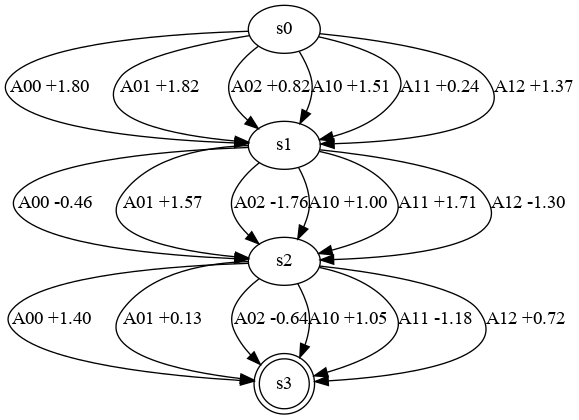

In [41]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

## Random Game 2
Any non-terminal state can goes to any subsequent state.

In [38]:
spec = mdp.MDPSpec()
num_non_terminal_states = 3
num_actions = (2, 3)
reward_range = [-2,2]
action_sets = []
for per_player_actions in num_actions:
    index_actions = np.arange(per_player_actions)
    action_sets.append([str(a) for a in index_actions])
print("Action set for each player: ", action_sets)

actions = list(itertools.product(*action_sets))
single_player_actions = [''.join(a) for a in actions]
print("Merged action set: ", single_player_actions)
single_player_action_set = []
for a in single_player_actions:
    single_player_action_set.append(spec.action('A'+a))

state_set =[]
for i in range(num_non_terminal_states):
    state_set.append(spec.state(f"s{i}"))
state_set.append(spec.state(f"s{i+1}", terminal_state=True))
print(state_set)

for j in range(len(state_set)-1):
    for k in range(j+1, len(state_set)):
        for a in single_player_action_set:
            spec.transition(state_set[j], a, mdp.NextState(state_set[k]))
            spec.transition(state_set[j], a, mdp.Reward(np.random.uniform(*reward_range)))  # random reward for each transition

Action set for each player:  [['0', '1'], ['0', '1', '2']]
Merged action set:  ['00', '01', '02', '10', '11', '12']
[State(s0, 0, False), State(s1, 1, False), State(s2, 2, False), State(s3, 3, True)]


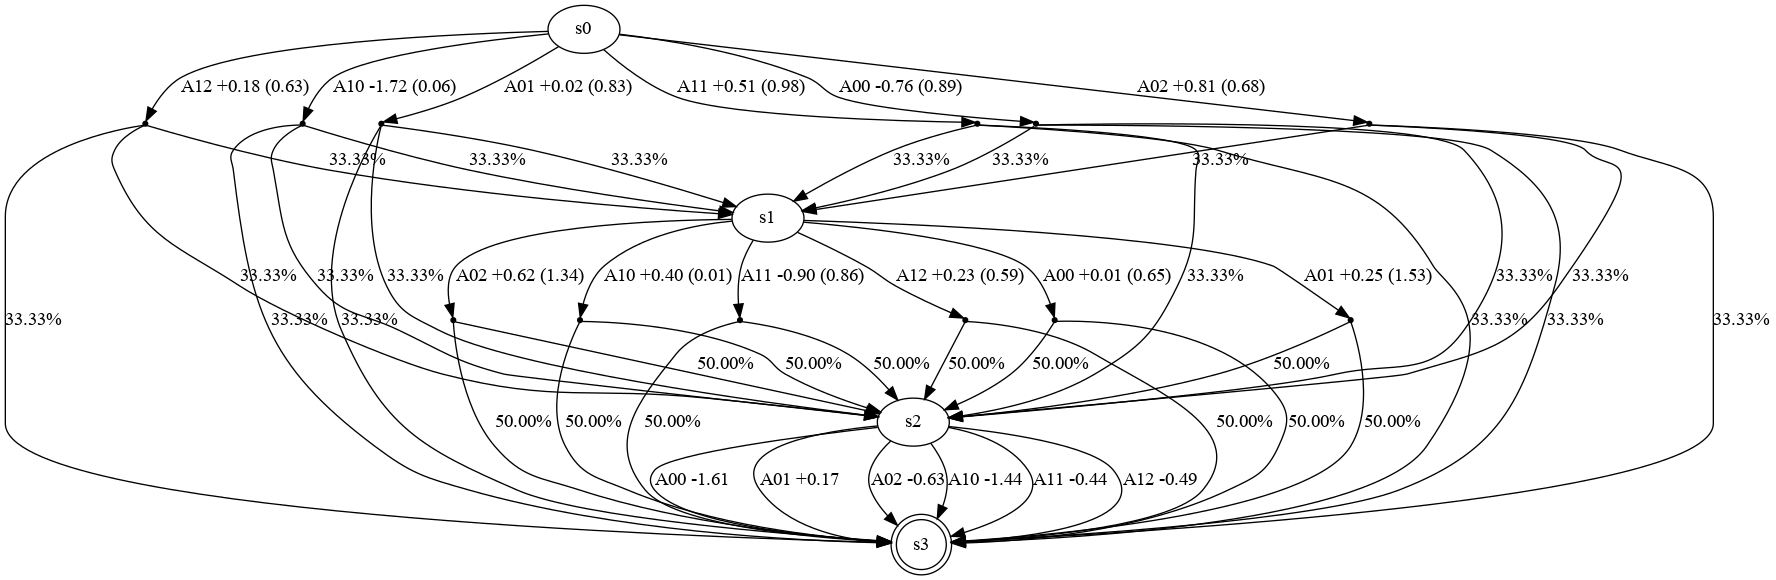

In [39]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)

## Random Game 3
Any non-terminal state can goes to any state (not itself).

In [36]:
spec = mdp.MDPSpec()
num_non_terminal_states = 2
num_actions = (2, 3)
reward_range = [-2,2]
action_sets = []
for per_player_actions in num_actions:
    index_actions = np.arange(per_player_actions)
    action_sets.append([str(a) for a in index_actions])
print("Action set for each player: ", action_sets)

actions = list(itertools.product(*action_sets))
single_player_actions = [''.join(a) for a in actions]
print("Merged action set: ", single_player_actions)
single_player_action_set = []
for a in single_player_actions:
    single_player_action_set.append(spec.action('A'+a))

state_set =[]
for i in range(num_non_terminal_states):
    state_set.append(spec.state(f"s{i}"))
state_set.append(spec.state(f"s{i+1}", terminal_state=True))
print(state_set)

for j in range(len(state_set)-1):
    for k in range(len(state_set)):
        if k != j:
            for a in single_player_action_set:
                spec.transition(state_set[j], a, mdp.NextState(state_set[k]))
                spec.transition(state_set[j], a, mdp.Reward(np.random.uniform(*reward_range)))  # random reward for each transition

Action set for each player:  [['0', '1'], ['0', '1', '2']]
Merged action set:  ['00', '01', '02', '10', '11', '12']
[State(s0, 0, False), State(s1, 1, False), State(s2, 2, True)]


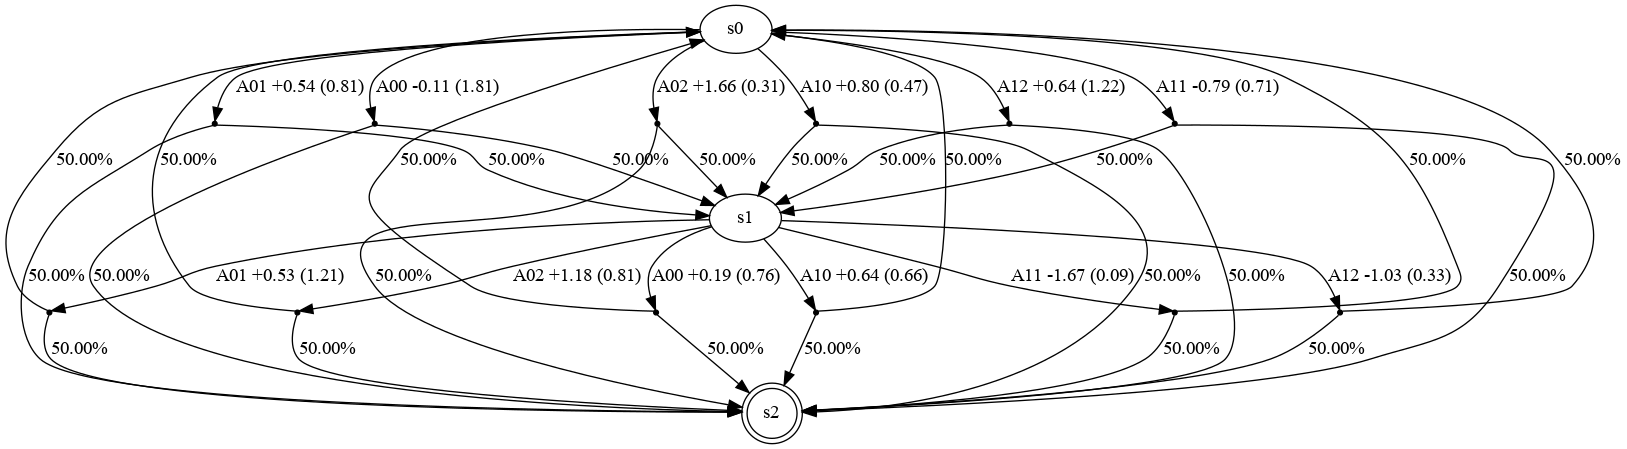

In [37]:
spec_graph = spec.to_graph()
spec_png = mdp.graph_to_png(spec_graph)

mdp.display_mdp(spec)